

Nama: Dwi Putra Satria utama



`Objective:`

Membangun model klasifikasi menggunakan Random Forest dan salah satu algoritma boosting untuk memprediksi apakah seorang pasien survived atau tidak survived, berdasarkan dataset yang sudah tersedia.

`Problem Statement:`

Dalam proyek ini, tujuan saya adalah untuk mengembangkan sebuah model klasifikasi yang dapat memprediksi apakah seorang pasien akan meninggal atau tidak. Saya akan menggunakan dua metode yaitu `Random Forest dan salah satu algoritma boosting`. Model ini akan dijalankan pada dataset yang telah saya peroleh dari query SQL berikut:

SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_020_rmt.heart-failure`



# 2 - Query SQL

SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_020_rmt.heart-failure`

# 3 - Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


# 4 - Data loading

In [43]:
df = pd.read_csv('heart-failure.csv')
df.shape[0]

299

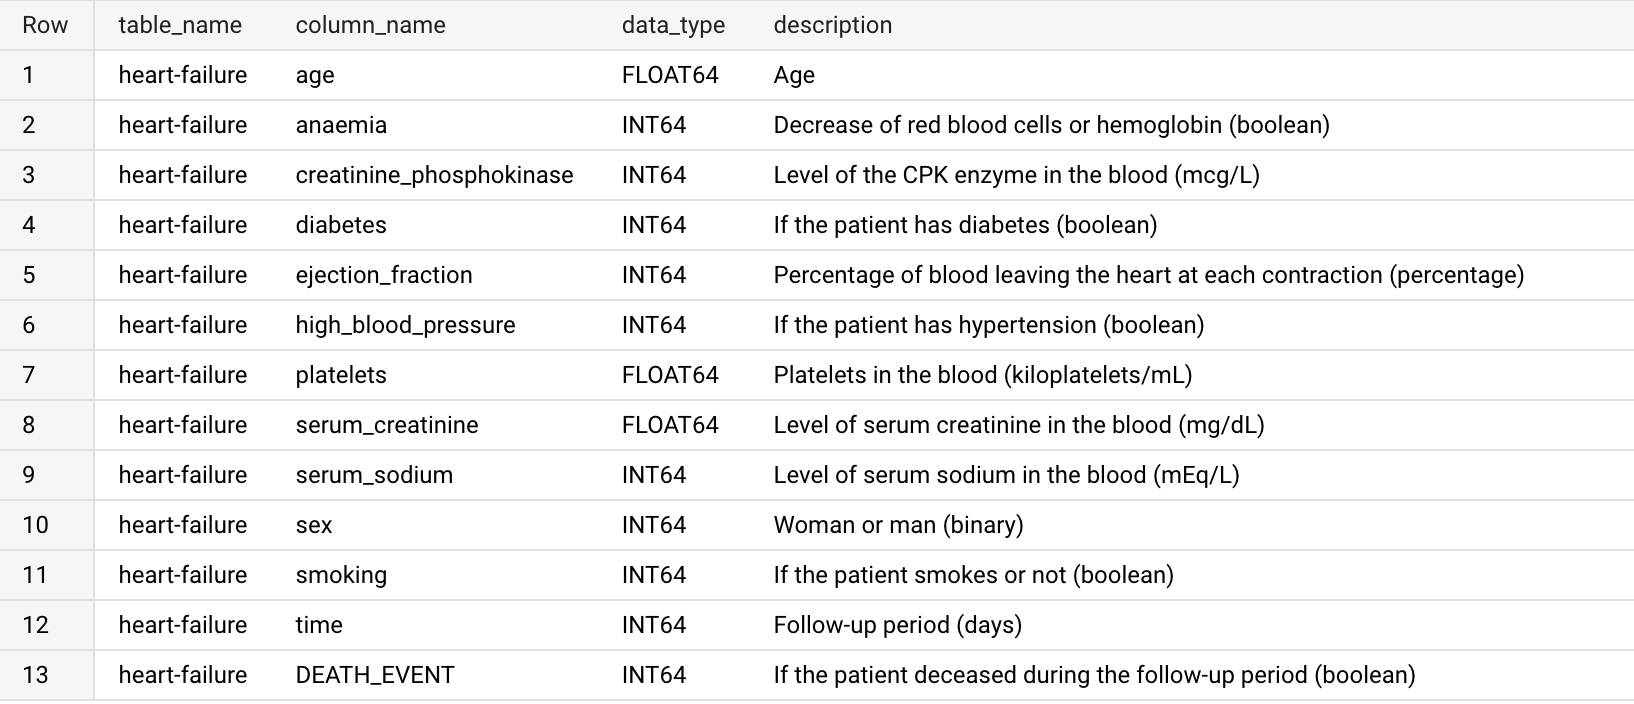

`age:`

Umur pasien dalam tahun.

`anaemia:` 

Merupakan variabel biner (0 atau 1) yang menunjukkan apakah pasien mengalami anemia.

Dengan asumsi 0 menunjukkan tidak ada anemia, sedangkan nilai 1 menunjukkan adanya anemia.

`creatinine_phosphokinase:`

Tingkat enzim creatinine phosphokinase (CPK) dalam darah pasien. CPK adalah enzim yang terkait dengan kerusakan otot jantung.

`diabetes:`

Merupakan variabel biner (0 atau 1) yang menunjukkan apakah pasien memiliki diabetes. 

Dengan asumsi 0 menunjukkan tidak memiliki diabetes, sedangkan nilai 1 menunjukkan adanya diabetes.

`ejection_fraction:` 

Persentase darah yang dipompa keluar dari ventrikel kiri saat jantung berkontraksi. Nilai ini memberikan indikasi tentang fungsi kontraktif jantung.

`high_blood_pressure:` 

Merupakan variabel biner (0 atau 1) yang menunjukkan apakah pasien memiliki tekanan darah tinggi (hipertensi).

Dengan asumsi 0 menunjukkan tekanan darah normal, sedangkan nilai 1 menunjukkan adanya tekanan darah tinggi.

`platelets:`

Trombosit dalam darah

`serum_creatinine:` 

Tingkat serum creatinine dalam darah pasien, yang digunakan sebagai indikator fungsi ginjal.

`serum_sodium:` 

Tingkat serum sodium dalam darah pasien, yang mengacu pada konsentrasi natrium dalam cairan tubuh.

`sex:`

 Merupakan variabel biner (0 atau 1) yang menunjukkan jenis kelamin pasien.

 Dengan asumsi 0 menunjukkan perempuan, sedangkan nilai 1 menunjukkan laki-laki.

`smoking:` 

Merupakan variabel biner (0 atau 1) yang menunjukkan apakah pasien merokok.

Dengan asumsi 0 menunjukkan tidak merokok, sedangkan nilai 1 menunjukkan merokok.

`time:` 

Waktu pengamatan pasien dalam jumlah hari sejak awal penelitian.

`DEATH_EVENT:`

 Merupakan variabel biner (0 atau 1) yang menunjukkan apakah pasien mengalami kematian selama periode pengamatan.

 Dengan asumsi 0 menunjukkan tidak ada kematian, sedangkan nilai 1 menunjukkan adanya kematian.

In [3]:
# menampilkan 10 data pertama
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [4]:
# menampilkan 10 data terakhir
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [5]:
# duplikasi dataset
df_copy = df.copy()

Diperlukan jika dibutuhkan

# 5 - Eksploratory data analysis (EDA)

## Cek info data

In [6]:
# cek data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Data terdiri dari 299 baris dan 13 kolom, semua kolom bertipe data numerik. Beberapa kolom memiliki nilai yang mewakili kategori tertentu, kolom lainnya mewakili nilai sebenarnya.

## Mencari data yang hilang

In [7]:
# cek data hilang
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak terdapat missing values ketika dicek menggunakan .isnull

## Cek data yang terduplikasi

In [8]:
# menghitung data yang terduplikasi
duplicate = df.duplicated().sum()
duplicate

0

Tidak ada data yang terduplikasi

# Cek korelasi

In [9]:
# Pisahkan kategori dan numerik untuk mencari korelasi
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [10]:
# Membuat list untuk menyimpan hasil uji chi-square
results_list = []

# Melakukan uji chi-square untuk setiap kolom kategorikal
for column in categorical_columns:
    crosstab = pd.crosstab(df[column], df['DEATH_EVENT'])
    chi2, p_value, dof, expected = chi2_contingency(crosstab)
    
    results_list.append({
        'Column': column,
        'Chi-square': chi2,
        'P-value': p_value
    })

# Mengonversi uji chi-square menjadi DataFrame
chi_square_results = pd.DataFrame(results_list)
chi_square_results

,Column,Chi-square,P-value
0,anaemia,1.042175,3.073161e-01
1,diabetes,0.000000,1.000000e+00
2,high_blood_pressure,1.543461,2.141034e-01
3,sex,0.000000,1.000000e+00
4,smoking,0.007331,9.317653e-01
5,DEATH_EVENT,294.430106,5.386429e-66


Kali ini saya akan memasang threshold 0.2 sebagai nilai signifikansi, sehingga fitur yang memiliki hampir memiliki korelasi adalah fitur high_blood_pressure. Sehingga saya memutuskan bahwa fitur tersebut memiliki korelasi dengan DEATH_EVENT

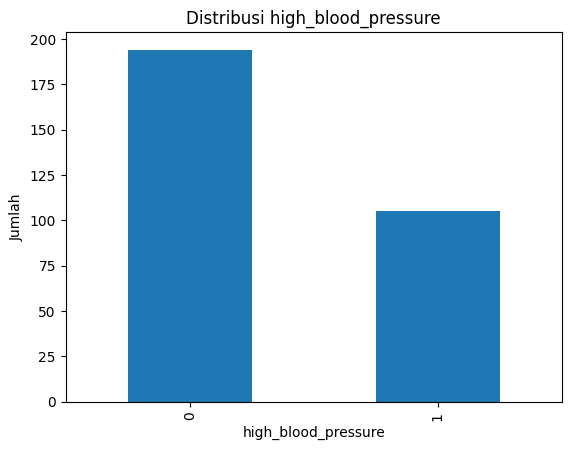

high_blood_pressure
0    194
1    105
Name: count, dtype: int64



In [11]:
# Cek visualisasi distribusi fitur kategori yang berkorelasi
korelasi_columns = ['high_blood_pressure']

# Visualisasi distribusi
for column in korelasi_columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.show()

# Pemeriksaan jumlah kategori
for column in korelasi_columns:
    print(df[column].value_counts())
    print()

Saya menyatakan bahwa fitur high_blood_pressure, memiliki data yang balance karena perbandingan data tidak melebihi 3:1

In [12]:
# Menghitung korelasi antara variabel numerik dengan variabel target
correlation_results = df[numerical_columns + ['DEATH_EVENT']].corr()['DEATH_EVENT'].drop('DEATH_EVENT')

# Menjadikan dataframe
correlation_df = pd.DataFrame(correlation_results)
correlation_df

,DEATH_EVENT
age,0.253729
creatinine_phosphokinase,0.062728
ejection_fraction,-0.268603
platelets,-0.049139
serum_creatinine,0.294278
serum_sodium,-0.195204
time,-0.526964


Variabel yang memiliki korelasi dengan "DEATH_EVENT" (dengan nilai absolut korelasi > 0.1) berdasarkan hasil tersebut adalah:

ejection_fraction: Korelasi = -0.268603
Korelasi negatif yang kuat menunjukkan bahwa semakin rendah nilai ejection fraction, semakin tinggi kemungkinan terjadinya "DEATH_EVENT".

serum_creatinine: Korelasi = 0.294278
Korelasi positif menunjukkan bahwa semakin tinggi nilai serum creatinine, semakin tinggi kemungkinan terjadinya "DEATH_EVENT".

time: Korelasi = -0.526964
Korelasi negatif yang kuat menunjukkan bahwa semakin tinggi nilai time (waktu observasi), semakin rendah kemungkinan terjadinya "DEATH_EVENT".

## Cek data target

Jumlah: DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


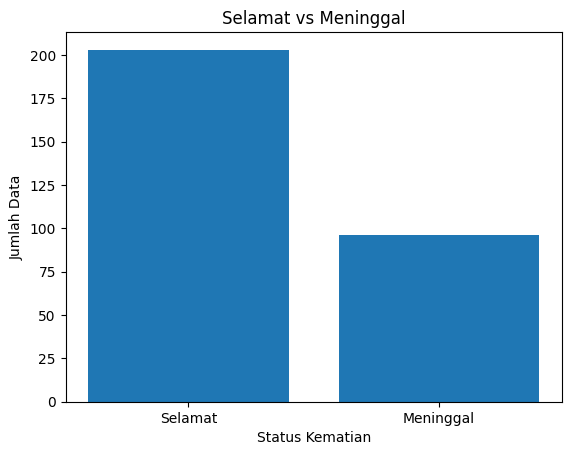

In [13]:
# Hitung jumlah data
status_count = df['DEATH_EVENT'].value_counts()
print('Jumlah:', status_count)

# Visualisasi perbandingan jumlah data
plt.bar(status_count.index, status_count.values)
plt.xlabel('Status Kematian')
plt.ylabel('Jumlah Data')

# Atur label sumbu x
plt.xticks([0, 1], ['Selamat', 'Meninggal'])

# Atur judul dan sumbu y
plt.title('Selamat vs Meninggal')
plt.ylabel('Jumlah Data')

plt.show()

Berdasarkan data tersebut bahwa cenderung seimbang karena tidak melebihi 3:1

In [14]:
## Cek deskripsi data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Usia: Rata-rata usia pasien adalah sekitar 61 tahun, dengan rentang usia antara 40 hingga 95 tahun.

Anemia: Sekitar 43% pasien dalam dataset ini mengalami anemia

Enzim Kreatinin: Rata-rata enzim kreatinin dalam darah pasien adalah sekitar 582

Diabetes: Sekitar 42% pasien dalam dataset ini memiliki diabetes

Ejection Fraction: Rata-rata fraksi ejeksi adalah sekitar 38%, dengan rentang antara 14 hingga 80%. Standar deviasi yang tinggi menunjukkan variasi yang signifikan dalam fraksi ejeksi.

Tekanan Darah: Rata-rata tekanan darah pasien adalah sekitar 0.35

Platelets: Rata-rata jumlah platelet dalam darah pasien adalah sekitar 263,358, dengan standar deviasi yang cukup tinggi menunjukkan variasi yang signifikan dalam jumlah platelet.

Serum Kreatinin: Rata-rata serum kreatinin dalam darah pasien adalah sekitar 1.39, dengan standar deviasi yang tinggi menunjukkan variasi yang signifikan dalam tingkat serum kreatinin.

Serum Sodium: Rata-rata kadar serum sodium dalam darah pasien adalah sekitar 137, dengan standar deviasi yang rendah menunjukkan variasi yang lebih kecil dalam tingkat serum sodium.

Jenis Kelamin (sex): Sekitar 65% pasien dalam dataset ini adalah laki-laki (nilai 1)

Merokok (smoking): Sekitar 32% pasien dalam dataset ini adalah perokok (nilai 1)

# 6 - Data Preprocessing

## Handling missing values

Bagian ini kita skip karena tidak ditemukan missing values pada proses EDA

## Feature selection

Fitur yang digunakan adalah fitur yang saya simpulkan memiliki korelasi. Fitur tersebut sudah dicari ketika dalam proses EDA sebagai berikut:

high_blood_pressure


ejection_fraction

serum_creatinine

time

## Balancing data secara sempurna

In [15]:
df = df.sort_values(by='DEATH_EVENT')

# 4000 teratas sentiment category
survived = df[df["DEATH_EVENT"] == 0].head(96)
no_survived = df[df["DEATH_EVENT"] == 1].head(96)


# concatenate
df = pd.concat([survived, no_survived])

# reset  index 
df = df.reset_index(drop=True)

# hitung jumlah data
target = df['DEATH_EVENT'].value_counts()
print('Jumlah:', target)

Jumlah: DEATH_EVENT
0    96
1    96
Name: count, dtype: int64


Data sudah dibalancekan dengan metode undersampling

## Memisihkan antara fitur `X` dan target `y`

In [16]:
# splitting X dan y
X = df[['high_blood_pressure', 'ejection_fraction', 'serum_creatinine', 'time']]
y = df['DEATH_EVENT']


## Memisahkan antara train set dan test set

In [17]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print(X_train.shape)
print(X_test.shape)

(153, 4)
(39, 4)


## Handling outliers

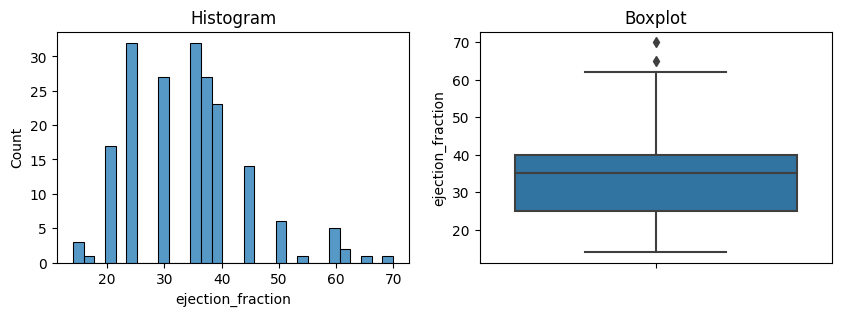

Skewness: 0.6978636545064683
The distribution is skewed


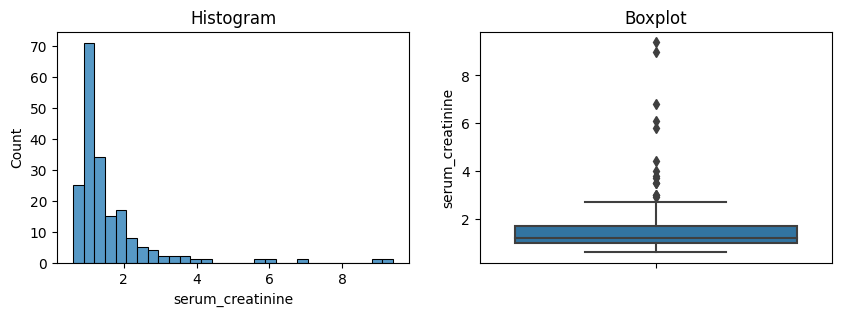

Skewness: 3.9510211346605724
The distribution is skewed


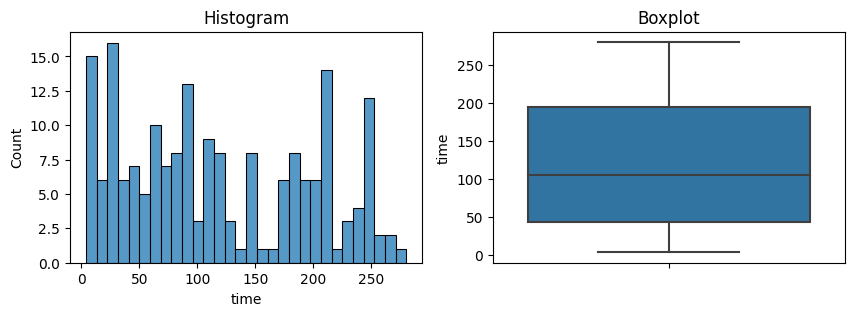

Skewness: 0.285230186519102
The distribution is normal


In [18]:
# Cek visualisasi dengan histogram dan boxplot

numeric_columns = ['ejection_fraction', 'serum_creatinine', 'time']

# Cek distribusi data dan outliers
def check_distribution_outliers(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[column].skew())
        if (df[column].skew() <= -0.5) or (df[column].skew() >= 0.5):
            print('The distribution is skewed')
        else:
            print('The distribution is normal')

check_distribution_outliers(df[numeric_columns], numeric_columns)

Beberapa fitur mengalami outliers, disini saya memutuskan untuk menghandle outliers dengan winsorizer walaupun random forest dan adaboost relatif tahan terhadap outliers

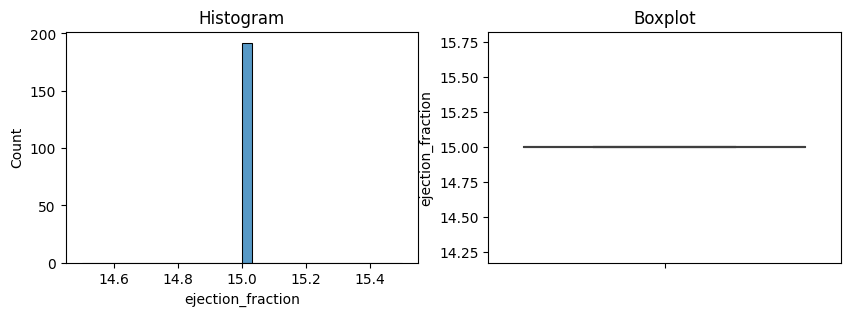

Skewness: 0
The distribution is normal


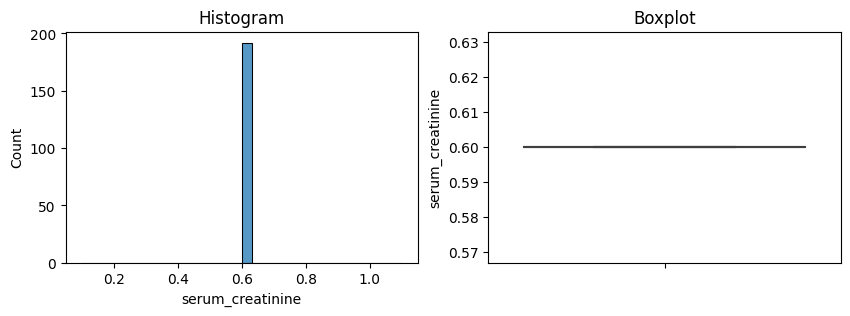

Skewness: 0
The distribution is normal


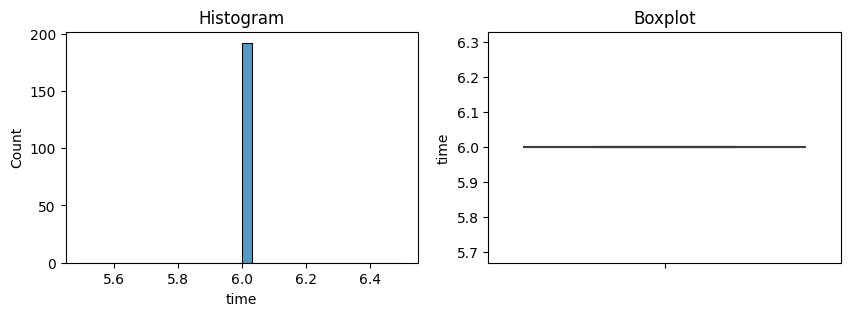

Skewness: 0
The distribution is normal


In [19]:
# Define the percentile limits for Winsorizing (e.g., 1st and 99th percentiles)
lower_limit = 0.01
upper_limit = 0.99

# Apply Winsorizing to the numeric columns
for column in numeric_columns:
    df[column] = winsorize(df[column], limits=(lower_limit, upper_limit))

# After applying Winsorizing, re-run the visualization and outlier check
check_distribution_outliers(df[numeric_columns], numeric_columns)


## Feature scaling & encoding

In [20]:
X.columns.tolist()

['high_blood_pressure', 'ejection_fraction', 'serum_creatinine', 'time']

In [21]:
# splitt kolom numerik dan kategori
numerical_cols = ['time',
 'ejection_fraction',
 'serum_creatinine']
categorical_cols = ['high_blood_pressure']

## Pipeline

In [22]:
# Preprocessing pipeline

# merubah nilai menggunakan standardscaler dan onehotencoder
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# random forest pipeline
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=1))
])

# gradient boosting pipeline
model_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=1))
])

# 7 - Model

## Model training

In [23]:
# model training random forest
model_rf.fit(X_train, y_train)


# model training gradient boosting
model_gb.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['time', 'ejection_fraction',
                                                   'serum_creatinine']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['high_blood_pressure'])])),
                ('classifier', GradientBoostingClassifier(random_state=1))])

## Model predict


In [24]:
# model predict rf
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

# model predict gb
y_pred_train_gb = model_gb.predict(X_train)
y_pred_test_gb = model_gb.predict(X_test)


## Model evaluation

In [25]:
# model evaluation rf

# confusion matrix train 
print('Hasil prediksi train-set rf')
print(confusion_matrix(y_train, y_pred_train_rf))

# confusion matrix test
print('\n Hasil prediksi test-set rf')
print(confusion_matrix(y_test, y_pred_test_rf))


Hasil prediksi train-set rf
[[81  0]
 [ 0 72]]

 Hasil prediksi test-set rf
[[11  4]
 [ 2 22]]


In [26]:
# model evaluation gb

# confusion matrix train 
print('Hasil prediksi train-set gb')
print(confusion_matrix(y_train, y_pred_train_gb))

# confusion matrix test
print('\n Hasil prediksi test-set gb')
print(confusion_matrix(y_test, y_pred_test_gb))

Hasil prediksi train-set gb
[[81  0]
 [ 1 71]]

 Hasil prediksi test-set gb
[[11  4]
 [ 2 22]]


In [27]:
# classification report rf

# classification report train 
print('Hasil prediksi train-set rf')
print(classification_report(y_train, y_pred_train_rf))

# classification report test
print('\n Hasil prediksi test-set rf')
print(classification_report(y_test, y_pred_test_rf))


Hasil prediksi train-set rf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        72

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153


 Hasil prediksi test-set rf
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.85      0.92      0.88        24

    accuracy                           0.85        39
   macro avg       0.85      0.82      0.83        39
weighted avg       0.85      0.85      0.84        39



Analisis dari hasil recall random forest adalah sebagai berikut:

Pada train-set, recall untuk kelas 0 (survived) adalah 1.00, yang berarti model mampu mengidentifikasi seluruh sampel secara akurat. Pada recall untuk kelas 1 (meninggal) adalah 1.00 yang berarti model juga mampu mengidentifikasi seluruh sampel secara akurat.

Pada test-set, recall untuk kelas 0 adalah sekitar 0.73, menunjukkan bahwa model  mampu mengidentifikasi mayoritas sampel yang survived pada data uji. Namun, recall untuk kelas 1 adalah sekitar 0.92, yang menunjukkan bahwa model juga mampu mengintifikasi mayoritas sampel.


Dengan demikian model ini dapat dikategorikan cenderung overfit.

In [28]:
# classification report gb

# classification report train 
print('Hasil prediksi train-set gb')
print(classification_report(y_train, y_pred_train_gb))

# classification report test
print('\n Hasil prediksi test-set gb')
print(classification_report(y_test, y_pred_test_gb))

Hasil prediksi train-set gb
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       1.00      0.99      0.99        72

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153


 Hasil prediksi test-set gb
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.85      0.92      0.88        24

    accuracy                           0.85        39
   macro avg       0.85      0.82      0.83        39
weighted avg       0.85      0.85      0.84        39



Analisis dari hasil recall gradient boosting adalah sebagai berikut:

Pada train-set, recall untuk kelas 0 (survived) adalah 0.99, yang berarti model mampu mengidentifikasi mayoritas sampel secara akurat. Pada recall untuk kelas 1 (meninggal) adalah 0.99 yang berarti model juga mampu mengidentifikasi mayoritas sampel secara akurat.

Pada test-set, recall untuk kelas 0 adalah sekitar 0.73, menunjukkan bahwa model juga mampu mengidentifikasi sebagian besar sampel yang survived  pada data uji. Namun, recall untuk kelas 1 adalah sekitar 0.92, yang menunjukkan bahwa model mampu mengidentifikasi mayoritas sampel pada data uji.


Dengan demikian model ini dapat dikategorikan cenderung overfit.

# 8 - Hyperparameter

Memilih GridSearch karena dapat secara otomatis mencoba semua kombinasi hyperparameter yang telah ditentukan sebelumnya.

## Model definition

In [29]:
# definisikan paramater
param_rf = {
    'classifier__n_estimators': [200, 300],
    'classifier__max_depth': [5, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

# gridseacrh 
rf_grid = GridSearchCV(model_rf, param_rf, cv=5, scoring='recall', return_train_score=True)
rf_grid

param_gb = {
    'classifier__n_estimators': [100, 300],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__max_depth': [3, 7],
    'classifier__subsample': [0.8, 1.0],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 4]
}

# gridseacrh 
gb_grid = GridSearchCV(model_gb, param_gb, cv=5, scoring='recall', return_train_score=True)
gb_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['time',
                                                                          'ejection_fraction',
                                                                          'serum_creatinine']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['high_blood_pressure'])])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=1))]),
             param_grid={'classifier__learning_rate': [0.1, 0.01],
                         'classifier__max_depth': [3, 7],
                         'classifier__min_samples_leaf': [2, 4],
                         'classifier__min_samples_split': [5, 10],
                         'classifier__n_estimators': [100, 300],
                         'classifier__subsample': [0.8, 1.0]},
             return_train_score=True, scoring='recall')

## Model training

In [30]:
# model training
rf_grid.fit(X_train, y_train)

# model training
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['time',
                                                                          'ejection_fraction',
                                                                          'serum_creatinine']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['high_blood_pressure'])])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=1))]),
             param_grid={'classifier__learning_rate': [0.1, 0.01],
                         'classifier__max_depth': [3, 7],
                         'classifier__min_samples_leaf': [2, 4],
                         'classifier__min_samples_split': [5, 10],
                         'classifier__n_estimators': [100, 300],
                         'classifier__subsample': [0.8, 1.0]},
             return_train_score=True, scoring='recall')

In [31]:
# kombinasi paramter terbaik
print('best params rf:', rf_grid.best_params_)

# kombinasi paramter terbaik
print('best params gb:', gb_grid.best_params_)


best params rf: {'classifier__max_depth': 10, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
best params gb: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}


Setelah melalui gridsearch, didapatkan parameter terbaik sebagai berikut:

best params rf: {'classifier__max_depth': 10, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

best params gb: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}

## Model prediction

In [32]:
# prediksi data train
y_pred_train_rf_tuning = rf_grid.predict(X_train)
# prediksi data test
y_pred_test_rf_tuning = rf_grid.predict(X_test)

# prediksi data train
y_pred_train_gb_tuning = gb_grid.predict(X_train)
# prediksi data test
y_pred_test_gb_tuning = gb_grid.predict(X_test)

## Model evaluation

In [33]:
# confusion matrix train rf
print('Hasil prediksi train-set rf')
print(confusion_matrix(y_train, y_pred_train_rf_tuning))

# confusion matrix test rf
print('\n Hasil prediksi test-set rf')
print(confusion_matrix(y_test, y_pred_test_rf_tuning))

# confusion matrix train gb
print('Hasil prediksi train-set gb')
print(confusion_matrix(y_train, y_pred_train_gb_tuning))

# confusion matrix test gb
print('\n Hasil prediksi test-set gb')
print(confusion_matrix(y_test, y_pred_test_gb_tuning))

Hasil prediksi train-set rf
[[80  1]
 [ 4 68]]

 Hasil prediksi test-set rf
[[12  3]
 [ 3 21]]
Hasil prediksi train-set gb
[[81  0]
 [ 1 71]]

 Hasil prediksi test-set gb
[[10  5]
 [ 3 21]]


In [34]:
# confusion matrix train 
print('Hasil prediksi train-set tuning rf')
print(classification_report(y_train, y_pred_train_rf_tuning))

# confusion matrix test
print('\n Hasil prediksi test-set tuning rf')
print(classification_report(y_test, y_pred_test_rf_tuning))



Hasil prediksi train-set tuning rf
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        81
           1       0.99      0.94      0.96        72

    accuracy                           0.97       153
   macro avg       0.97      0.97      0.97       153
weighted avg       0.97      0.97      0.97       153


 Hasil prediksi test-set tuning rf
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.88      0.88      0.88        24

    accuracy                           0.85        39
   macro avg       0.84      0.84      0.84        39
weighted avg       0.85      0.85      0.85        39



Analisis dari hasil recall random forest setelah di-tuning adalah sebagai berikut:

Pada train-set, recall untuk kelas 0 (survived) adalah 0.97, yang berarti model mampu mengidentifikasi sebagian sampel secara akurat. Pada recall untuk kelas 1 (meninggal) adalah 0.97.

Pada test-set, recall untuk kelas 0 adalah sekitar 0.80, menunjukkan bahwa model juga mampu mengidentifikasi mayoritas sampel yang survived  pada data uji. Namun, recall untuk kelas 1 adalah sekitar 0.88, yang menunjukkan bahwa model mampu mengidentifikasi mayoritas sampel pada data uji.


Dengan demikian model ini dapat dikategorikan cenderung overfit.

In [35]:
# confusion matrix train 
print('Hasil prediksi train-set tuning gb')
print(classification_report(y_train, y_pred_train_gb_tuning))

# confusion matrix test
print('\n Hasil prediksi test-set tuning gb')
print(classification_report(y_test, y_pred_test_gb_tuning))

Hasil prediksi train-set tuning gb
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       1.00      0.99      0.99        72

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153


 Hasil prediksi test-set tuning gb
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.81      0.88      0.84        24

    accuracy                           0.79        39
   macro avg       0.79      0.77      0.78        39
weighted avg       0.79      0.79      0.79        39



Secara singkat, pengaruh hyperparameter grid search pada model random forest dan gradient boosting dalam kasus ini cenderung tidak begitu signifikan. Meskipun grid search digunakan untuk mencari kombinasi hyperparameter yang optimal pada kedua model tersebut, tidak ada perubahan yang drastis dalam performa model pada data latih dan data uji setelah dilakukan grid search. 

Meskipun tidak ada peningkatan yang nyata dalam performa pada latih dan data uji, penggunaan hyperparameter grid search dapat membantu mengoptimalkan model dan memilih konfigurasi yang lebih baik daripada menggunakan nilai default. Dengan mencoba berbagai kombinasi hyperparameter, kita dapat menemukan kombinasi yang memberikan kinerja yang lebih baik, lebih sesuai dengan data yang digunakan.

Namun, penting untuk diingat bahwa hasil grid search dan peningkatan performa yang dihasilkan tidak selalu terjamin. Terkadang, ada keterbatasan pada dataset atau kombinasi hyperparameter yang diuji. Selain itu, hasil grid search perlu dinilai dengan hati-hati dan dikombinasikan dengan evaluasi lain seperti validasi silang (cross-validation) dan metrik evaluasi lainnya untuk mendapatkan gambaran yang lebih lengkap tentang kinerja model.

# 9 - Model saving

In [36]:
# Save the Files

import pickle
import json

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(numerical_cols, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(categorical_cols, file_2)

with open('model_preprocessor.pkl', 'wb') as file_3:
  pickle.dump(preprocessor, file_3)

with open('rf_grid.pkl', 'wb') as file_4:
  pickle.dump(rf_grid, file_4)

with open('gb_grid.pkl', 'wb') as file_5:
  pickle.dump(gb_grid, file_5)


# 10 - Inference

In [37]:
# Membuat data baru

new_data = {'age': [70],
 'anaemia': [1],
 'creatinine_phosphokinase': [500],
 'diabetes': [1],
 'ejection_fraction': [60],
 'high_blood_pressure': [1],
 'platelets': [327000],
 'serum_creatinine': [3],
 'serum_sodium': [140],
 'sex': [1],
 'smoking': [1],
 'time': [100]
}

new_data = pd.DataFrame(new_data)

In [38]:
# melihat data inference
new_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,70,1,500,1,60,1,327000,3,140,1,1,100


In [39]:
# Make predictions on new_data
pred1 = rf_grid.predict(new_data)
pred1

array([1], dtype=int64)

In [40]:
# Make predictions on new_data
pred2 = gb_grid.predict(new_data)
pred2

array([1], dtype=int64)

Karena performa antara model random forest dan gradient boosting hampir serupa, maka dari itu kedua model ini mengidentifikasi hasil serupa ketika digunakan pada data baru

Langkah yang perlu diambil ketika orang tersebut terprediksi akan meninggal adalah segera memberikan pemberitahuan kepada tim medis yang bertanggung jawab atas pasien yang terprediksi meninggal. Ini memungkinkan mereka untuk melakukan evaluasi lebih mendalam tentang kondisi pasien dan mengambil langkah-langkah yang sesuai.

# 11 - Kesimpulan

- Tidak terdapat hubungan yang signifikan antara jenis kelamin, tekanan darah, diabetes, dan anemia dengan status pasien dalam dataset ini.

- Proporsi pasien yang meninggal lebih tinggi pada pasien yang merokok daripada yang tidak merokok.

- Tidak ada ketidakseimbangan kelas yang signifikan dalam dataset.

- Hyperparameter tuning menggunakan GridSearchCV tidak menghasilkan perubahan yang signifikan dalam performa model pada data latih dan data uji.

- Meskipun tidak ada peningkatan yang nyata dalam performa pada data uji, penggunaan hyperparameter grid search dapat membantu mengoptimalkan model dan memilih konfigurasi yang lebih baik daripada menggunakan nilai default.

- Kedua model cenderung mengalami overfitting, karena memiliki recall yang sangat tinggi pada data latih dan perbedaan yang signifikan dengan data uji.

- Dalam kesimpulannya, meskipun ada beberapa fitur yang tidak menunjukkan hubungan yang signifikan dengan status pasien, kedua model klasifikasi (Random Forest dan Gradient Boosting) berhasil memberikan performa yang relatif baik dalam mengidentifikasi pasien yang meninggal. Namun, perlu diingat bahwa evaluasi model tidak hanya didasarkan pada satu metrik atau teknik saja, tetapi harus melibatkan evaluasi yang komprehensif dan validasi silang untuk memastikan kinerja yang konsisten.

- Dalam hal ini model dapat diimprove dengan
    1. Gunakan teknik data augmentation, seperti oversampling atau undersampling, jika dataset relatif kecil.
    2. Gunakan teknik seleksi fitur untuk memilih fitur-fitur yang betul betul paling relevan dan berpengaruh terhadap variabel target.

# Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

    Bagging adalah sebuah metode dalam Ensemble Learning yang digunakan untuk mengurangi kesalahan (error) dalam pembelajaran mesin dengan menggabungkan beberapa algoritma mesin learning yang homogen. Tujuannya adalah untuk menghasilkan model yang lebih akurat dan stabil. Dalam metode ini, model seperti decision tree dilatih secara terpisah menggunakan sampel acak dari set data pelatihan. Kemudian, hasil dari model dasar tersebut digabungkan dengan menggunakan teknik voting atau mengambil rerata untuk menghasilkan prediksi akhir. Dengan memanfaatkan variasi dari model dasar yang berbeda, bagging dapat meningkatkan performa dan kestabilan model.



2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

    Random Forest:

    Random Forest menggunakan pendekatan ensemble berbasis pohon, di mana setiap pohon dihasilkan secara independen dan acak dari subsampling data pelatihan.
    Setiap pohon di Random Forest dilatih menggunakan subset acak dari fitur-fitur yang tersedia.
    Prediksi akhir dibuat dengan menggabungkan hasil prediksi dari semua pohon dalam ensemble melalui voting atau mengambil rata-rata.
    Random Forest mampu mengatasi overfitting dan memiliki toleransi yang baik terhadap data yang berisik atau outlier.
    Kelebihan lainnya adalah Random Forest dapat memberikan estimasi pentingnya setiap fitur dalam proses pemodelan.

    Gradient Boosting:

    Gradient Boosting juga merupakan metode ensemble yang membangun model secara bertahap dengan menggabungkan serangkaian model dasar yang lemah (weak learners), seperti decision tree.
    Pada setiap langkah, model baru ditambahkan ke ensemble untuk memperbaiki prediksi kesalahan yang dibuat oleh model sebelumnya.
    Setiap model dasar dalam Gradient Boosting diberi bobot yang ditentukan berdasarkan besarnya kesalahan yang dihasilkan oleh model sebelumnya.
    Proses ini berfokus pada meminimalkan kesalahan prediksi secara iteratif.
    Gradient Boosting mampu menghasilkan model yang sangat akurat dan memiliki kekuatan untuk menangani data dengan noise atau outliers.    

    `Perbedaan utama antara algoritma Random Forest dan Gradient Boosting adalah cara mereka menggabungkan beberapa model dasar (base learners) untuk meningkatkan kinerja prediksi.`